In [1]:
from __future__ import absolute_import

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# DL libs
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout 

pd.set_option('display.max_columns', 564)



Using TensorFlow backend.


In [2]:
# Preprocessing Algo
from sklearn.decomposition import PCA

# Algo Stack to compare results 

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
# Metrics 
from sklearn.metrics import accuracy_score

## Load the dataset

In [4]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

# For training data
print("Training Data: {}".format(training_data.shape))
print("Null values present in training data: {}".format(training_data.isnull().values.any()))
  
# For testing data
print("Testing Data: {}".format(testing_data.shape))
print("Null values present in testing data: {}".format(testing_data.isnull().values.any()))

Training Data: (7352, 563)
Null values present in training data: False
Testing Data: (2947, 563)
Null values present in testing data: False


In [5]:
# glimpse of the first 5 rows (All columns)
training_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [6]:
# glimpse of the first 5 rows
pd.set_option('display.max_columns', 50)
training_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,...,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,...,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,...,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869,-0.986093,-0.999976,-0.999736,-0.999504,-0.997180,-0.983799,-0.986007,-0.627446,-0.850930,-0.911872,...,-0.035684,-0.230091,-0.511217,-0.995221,-0.995237,-0.995722,-0.995273,-0.995732,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,0.683250,0.837869,-0.992653,-0.999991,-0.999856,-0.999757,-0.998004,-0.981232,-0.991325,-0.786553,-0.559477,-0.761434,...,-0.273582,-0.510282,-0.830702,-0.995093,-0.995465,-0.995279,-0.995609,-0.997418,-0.995093,-0.999974,-0.995487,-1.000000,-0.936508,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
# training sampels: No need for subject column for our case

# Get X and y for training data
y_train = training_data['Activity']
X_train = training_data.drop(columns = ['Activity', 'subject'])

# Get X and y for testing data
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

## Visualise the dataset


In [8]:
# Count the number of records for each activity
count_of_each_activity = np.array(y_train.value_counts())


# Identify all the unqiue activities and in sorted order
activities = sorted(y_train.unique())


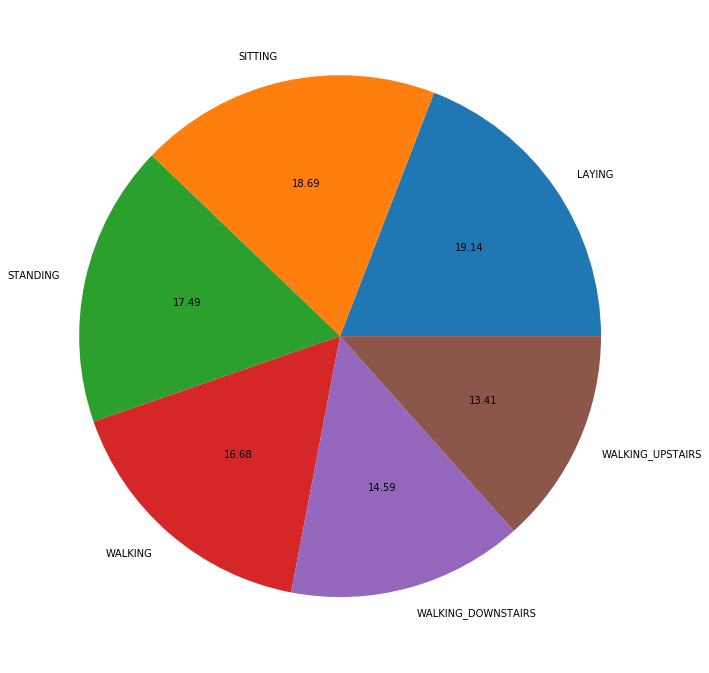

In [9]:
# Plot a pie chart for different activities
plt.figure(figsize=(12,12))
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

plt.show()

## Preprocessing - using PCA Algo to reduce dimention 

In [10]:
X_concat_for_pca = np.concatenate((X_train, X_test), axis=0)
y_concat_for_pca = np.concatenate((y_train, y_test), axis=0)

In [11]:
pca = PCA(n_components=36).fit(X_concat_for_pca)

In [12]:
# Attempt to reach 90% variance_ratio

print(np.cumsum(pca.explained_variance_ratio_))

[0.62227069 0.66999664 0.71017855 0.72841054 0.74452099 0.7565392
 0.76840923 0.7791716  0.78877912 0.79765045 0.80608242 0.81285948
 0.81929853 0.82505759 0.83027713 0.83537168 0.84008892 0.84456272
 0.8488989  0.85302852 0.85712662 0.86101269 0.86467001 0.86819779
 0.87165957 0.87497572 0.87808352 0.88109602 0.88405281 0.8868934
 0.88969434 0.89241923 0.89506117 0.897536   0.89987965 0.9021522 ]


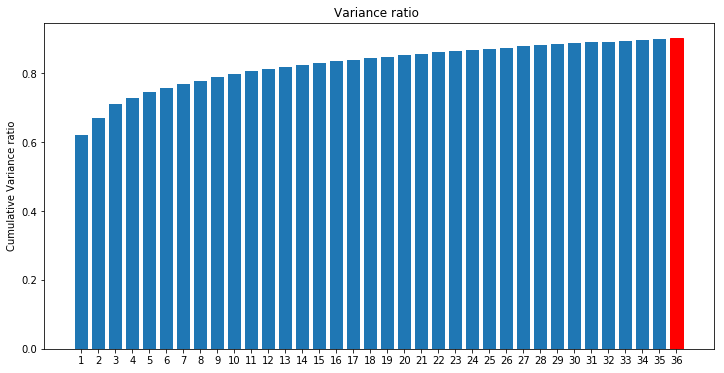

In [13]:
# Visualize the variance ratio to decide to which dimention to reduce 

eigenValuesIndexs = np.arange(1,37)

plt.figure(figsize=(12,6))

barlist=plt.bar(eigenValuesIndexs, np.cumsum(pca.explained_variance_ratio_))
barlist[35].set_color('r')
plt.xticks(eigenValuesIndexs)
plt.ylabel('Cumulative Variance ratio')
plt.title('Variance ratio ')

plt.show()


In [14]:
# Apply dimensionality reduction to X.
X_reduced = pca.transform(X_concat_for_pca)

print("New lightwhight sampels:", X_reduced.shape)

New lightwhight sampels: (10299, 36)


In [15]:
# Re-split the data 

# Split Data - 90% training and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_concat_for_pca, test_size=0.1, random_state=109)

### Classification phase! 

In [16]:
accuracy_scores = np.zeros(3)

# Support Vector Classifier
clf = SVC(gamma='scale').fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1500).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}'.format(accuracy_scores[1]))


Support Vector Classifier accuracy: 95.72815533980582
Logistic Regression accuracy: 94.5631067961165


#### - Side note: According to Scikit Documentation: The SAGA solver is often the best choice.

#### Bonus: simple neural network to classify our data  

In [17]:
# transform activities to int, so can be inserted to model

def Activity2int(y,activities):
    i = 0
    y_int = y.copy()
    for result in y: 
        for activity in activities:
            if activity == result:
                y_int[i] = activities.index(activity)
                i += 1
                
    return y_int

y_train_int = Activity2int(y_train, activities)
y_test_int = Activity2int(y_test, activities)

In [18]:
# 2 dense layers 
# 2 dropout layers to battle overfitting
# 1 softmax layer normalizes it into a probability distribution

model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation=tf.nn.softmax)
])

Loss function - This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

Optimizer - This is how the model is updated based on the data it sees and its loss function.

Metrics - Used to monitor the training and testing steps. I chose accuracy, same as other models.

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# As the model trains, the loss and accuracy metrics are displayed.
model.fit(X_train, y_train_int, epochs=15)

Epoch 1/15
9269/9269 [==============================] - 1s 57us/step - loss: 0.4021 - acc: 0.8592
Epoch 2/15
9269/9269 [==============================] - 0s 27us/step - loss: 0.1542 - acc: 0.9385
Epoch 3/15
9269/9269 [==============================] - 0s 26us/step - loss: 0.1253 - acc: 0.9467
Epoch 4/15
9269/9269 [==============================] - 0s 26us/step - loss: 0.1105 - acc: 0.9558
Epoch 5/15
9269/9269 [==============================] - 0s 26us/step - loss: 0.0971 - acc: 0.9642
Epoch 6/15
9269/9269 [==============================] - 0s 25us/step - loss: 0.0884 - acc: 0.9642
Epoch 7/15
9269/9269 [==============================] - 0s 25us/step - loss: 0.0776 - acc: 0.9707
Epoch 8/15
9269/9269 [==============================] - 0s 25us/step - loss: 0.0707 - acc: 0.9735
Epoch 9/15
9269/9269 [==============================] - 0s 25us/step - loss: 0.0639 - acc: 0.9756
Epoch 10/15
9269/9269 [==============================] - 0s 26us/step - loss: 0.0592 - acc: 0.9768: 0s - loss: 0.0610 

In [21]:
# Accuracy evaluation 

test_loss, test_acc = model.evaluate(X_test, y_test_int)
accuracy_scores[2] = test_acc*100

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

1030/1030 [==============================] - 0s 76us/step
Test accuracy: 0.966019417359991
Test loss: 0.07772721714041765


In [22]:
# View prediction example 

predictions = model.predict(X_test)

prediction_0 = np.argmax(predictions[0])
print("Model confidence of the activity:", predictions[0][prediction_0])
print("Model prediction:", activities[prediction_0])
print("Actual sample:", y_test[[0]])

Model confidence of the activity: 0.9999933
Model prediction: WALKING
Actual sample: ['WALKING']


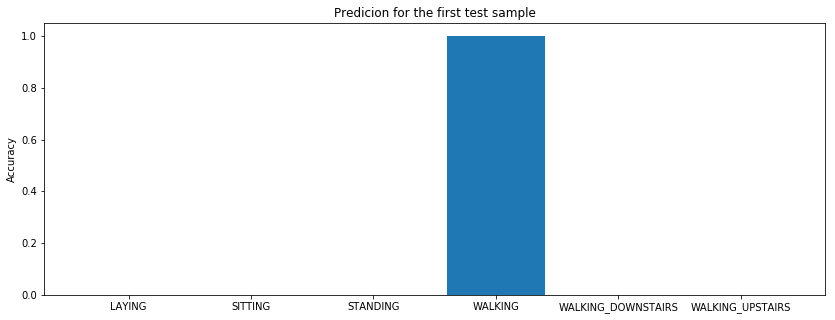

In [23]:
plt.figure(figsize=(14, 5))

barlist=plt.bar(activities, predictions[0])
plt.xticks(activities)
plt.ylabel('Accuracy')
plt.title('Predicion for the first test sample')

plt.show()


SVM: 95.72815533980582
Logistic regression: 94.5631067961165
Neural network: 96.60194173599909


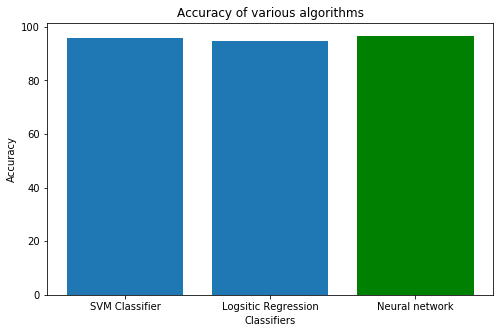

In [26]:
x = np.arange(1,4)

print("SVM:", accuracy_scores[0])
print("Logistic regression:", accuracy_scores[1])
print("Neural network:", accuracy_scores[2])

plt.figure(figsize=(8, 5))

barlist=plt.bar(x, accuracy_scores)
plt.xticks(x, ('SVM Classifier', 'Logsitic Regression', 'Neural network'))
barlist[2].set_color('g')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

plt.show()